## Group 3 - Project 2
# Online Shopper Purchase Prediction

In [12]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import model as Group3Models

In [13]:
#Read in CSV
online_shopping_df = pd.read_csv('online_shoppers_intention.csv')

online_shopping_df.info()

online_shopping_df["Revenue"].value_counts()

online_shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
#Drop the target column, setup X and y datasets for train test split
X = online_shopping_df.drop('Revenue', axis=1)
y = online_shopping_df['Revenue']

X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


<Axes: xlabel='OperatingSystems', ylabel='Count'>

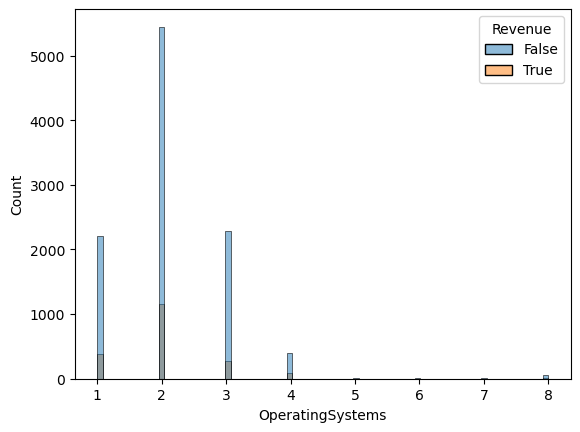

In [15]:
#EDA
sns.histplot(data=online_shopping_df, x='OperatingSystems', hue='Revenue')

<Axes: xlabel='ExitRates', ylabel='Count'>

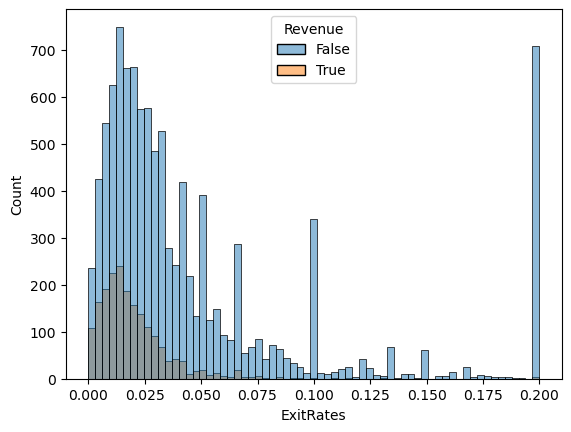

In [16]:
sns.histplot(data=online_shopping_df, x='ExitRates', hue='Revenue')

## Add Encodings to Feature Columns

In [17]:
#Encode VisitorType Column
ordinal_encoder = OrdinalEncoder()
X['VisitorType'] = ordinal_encoder.fit_transform(X[['VisitorType']])

#Ordinal Encode the Month Column
ordinal_encoder = OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
X['Month'] = ordinal_encoder.fit_transform(X[['Month']])
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1.0,1,1,1,1,2.0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1.0,2,2,1,2,2.0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1.0,4,1,9,3,2.0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1.0,3,2,2,4,2.0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1.0,3,3,1,4,2.0,True


## Train Test Split

In [18]:
#Train Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2.266299,77.618608,0.481025,34.935115,31.628608,1196.341697,0.021847,0.042516,6.199844,0.060396,6.655530,2.160882,2.326954,3.146286,4.086280,1.719105
std,3.294952,162.013159,1.233804,140.554847,44.650092,1841.724590,0.048254,0.048387,18.269780,0.195533,3.406686,0.950119,1.629787,2.393821,4.015425,0.689389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,190.125000,0.000000,0.013776,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,6.000000,0.000000,0.000000,18.000000,610.309524,0.003082,0.025000,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,2.000000
75%,4.000000,91.675000,0.000000,0.000000,38.000000,1461.750000,0.016667,0.050000,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,2.000000
max,27.000000,2156.166667,14.000000,2166.500000,686.000000,24844.156200,0.200000,0.200000,258.549873,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,2.000000


<Axes: >

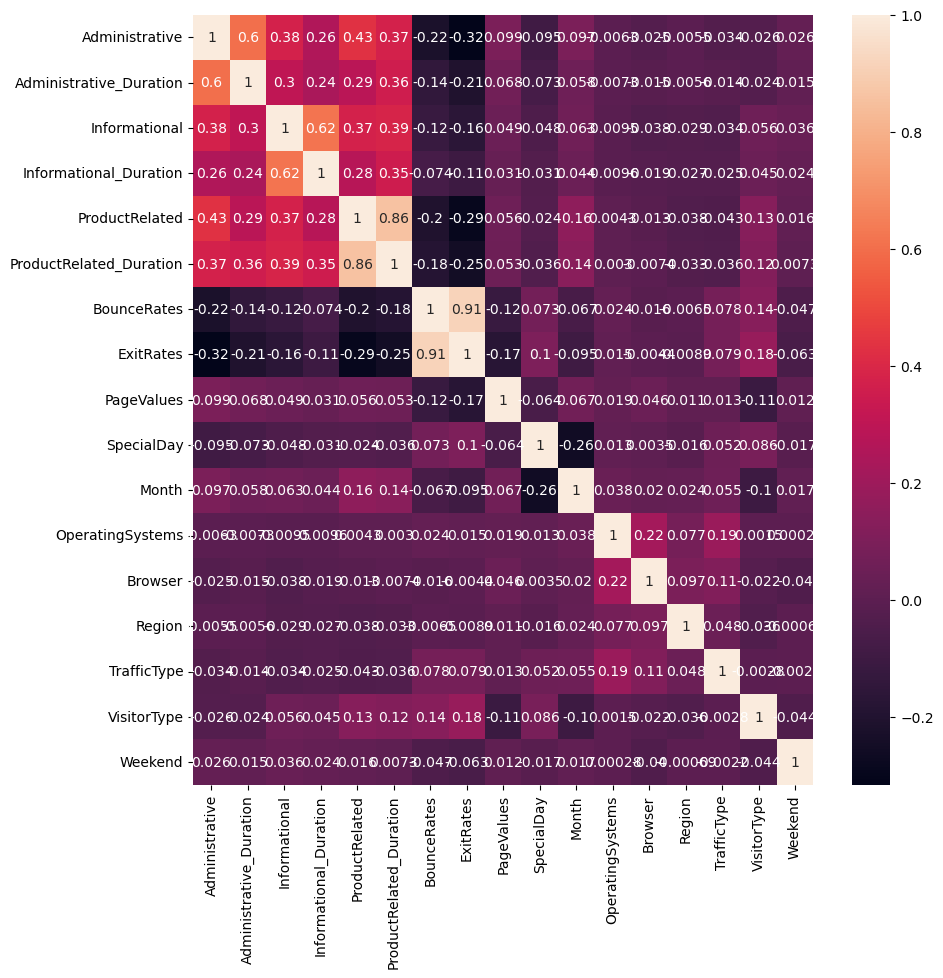

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=X.corr(), annot=True)

## Create a Model and predict

In [20]:
#Create a Random Forest Classifier
model = Group3Models.don_model()
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      7826
        True       0.73      0.53      0.61      1421

    accuracy                           0.90      9247
   macro avg       0.82      0.75      0.78      9247
weighted avg       0.89      0.90      0.89      9247

